# Exploring the FEC 2016 Elections Data


This project is an analysis for the contributions of the 2016 USA Presidential Elections.
Datasets were extracted from https://www.fec.gov/ and https://www.census.gov/ .

---

> Christos Kallaras , p2822009 <br />
>Department of Management Science and Technology <br />
>Master in Business Analytics <br />
>Athens University of Economics and Business


In [1]:
import requests
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

from collections import defaultdict

%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)

First i extract all the candidates.The file used shows the candidate's identification number, candidate’s name, party affiliation, election year, office state, office sought, district, incumbent/challenger status, status as a candidate, name of the candidate’s principal campaign committee, and address. 

In [2]:
# This is the header file
headers = pd.read_csv('https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cn_header_file.csv')
headers

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP


In [3]:
# Convert the headers into a list
headers = headers.columns.tolist()
headers

['CAND_ID',
 'CAND_NAME',
 'CAND_PTY_AFFILIATION',
 'CAND_ELECTION_YR',
 'CAND_OFFICE_ST',
 'CAND_OFFICE',
 'CAND_OFFICE_DISTRICT',
 'CAND_ICI',
 'CAND_STATUS',
 'CAND_PCC',
 'CAND_ST1',
 'CAND_ST2',
 'CAND_CITY',
 'CAND_ST',
 'CAND_ZIP']

In [4]:
# read the actual file
candidates = pd.read_csv('https://www.fec.gov/data/browse-data/files/bulk-downloads/2016/cn16.zip', 
                   sep="|", 
                   index_col=False, 
                   names=headers
                  )
print(candidates.shape)
candidates.head(5)

(7396, 15)


,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00097,"COX, JOHN R.",REP,2014,AK,H,0.0,C,N,C00525261,P.O. BOX 1092,NaN,ANCHOR POINT,AK,99556.0
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
3,H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,5.0,NaN,P,C00239038,PO BOX 2621,NaN,HUNTSVILLE,AL,35804.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0


Column CAND_NAME indicates the name of the candidate, CAND_PTY_AFFILIATION the Party affiliation of the candidate, CAND_ELECTION_YR the year of election and column CAND_STATUS the status of the candidate. A candidate can be Statutory , Non Statutory, Statutory for future election or Statutory in prior cycle. Column CAND_OFFICE indicates if the candidate runs for House , Senate or President. For this analysis we need the candidates that are running for President in the year 2016 and that they are statuatory.

In [5]:
# Select from the dataset only the candidates who follow the above criteria
candidates = candidates.loc[(candidates['CAND_ELECTION_YR'] == 2016) & (candidates['CAND_OFFICE'] == 'P') & (candidates['CAND_STATUS'] == 'C')]
print(candidates.shape)
candidates.head(5)

(72, 15)


,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4367,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
4377,P00003962,"SCHRINER, JOSEPH CHARLES",UNK,2016,US,P,0.0,O,C,C00385153,542 S MAIN ST,NaN,BLUFFTON,OH,45817.0
4379,P00004275,"BROWN, HARLEY D",NNE,2016,US,P,0.0,O,C,C00569442,6086 HAPPY LANE,NaN,NAMPA,ID,83686.0
4385,P00004861,"BICKELMEYER, MICHAEL",REP,2016,US,P,0.0,O,C,C00553206,399 PEARL ROAD,NaN,BRUNSWICK,OH,44212.0
4478,P20002671,"JOHNSON, GARY / WILLIAM ""BILL"" WELD",LIB,2016,US,P,0.0,O,C,C00605568,NaN,NaN,SALT LAKE CITY,UT,NaN


Before continuing lets see who are the candidates.

In [6]:
candidates['CAND_NAME'].unique()

array(['CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE',
       'SCHRINER, JOSEPH CHARLES', 'BROWN, HARLEY D',
       'BICKELMEYER, MICHAEL', 'JOHNSON, GARY / WILLIAM "BILL" WELD',
       'SANTORUM, RICHARD J.', 'HILL, CHRISTOPHER V',
       'PERRY, JAMES R (RICK)', 'STEIN, JILL', 'WELLS, ROBERT CARR JR',
       'WHITE, JEROME S', 'KREML, WILLIAM P', 'PAUL, RAND',
       'KASICH, JOHN R', 'MOOREHEAD, MONICA GAIL',
       'ADESHINA, YINKA ABOSEDE', 'JEROBOAN, KINS',
       'STEINBERG, MICHAEL ALAN', 'LOWER, BARTHOLOMEW JAMES MR.',
       'BOWERS, KERRY DALE', 'SHERMAN, JEFFERSON WOODSON',
       'CHRISTENSEN, DALE H', 'DUCKWALD, WANDA GAYLE',
       'CARSON, BENJAMIN S SR MD', 'EVERSON, MARK', 'WALKER, SCOTT',
       'CRUZ, RAFAEL EDWARD "TED"', 'LYNCH, DENNIS MICHAEL',
       'SANDERS, BERNARD', 'FIORINA, CARLY', 'KELSO, LLOYD THOMAS',
       'SCROGGIE, JEREMY', 'WILSON, WILLIE', 'PATAKI, GEORGE E',
       "O'MALLEY, MARTIN JOSEPH", 'GRAHAM, LINDSEY O',
       'WINSLOW, BRAD MR.', 'MA

Since the final 2 candidates running for Presdent in the 2016 elections were Hillary Clinton and Donald Trump, i will focus on them. As we can see both candidates have in their name the name of their selected Vice President also.So i will shorten them.

In [7]:
candidates.loc[candidates['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD J.'
candidates.loc[candidates['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY RODHAM'
candidates['CAND_NAME'].unique()

array(['CLINTON, HILLARY RODHAM', 'SCHRINER, JOSEPH CHARLES',
       'BROWN, HARLEY D', 'BICKELMEYER, MICHAEL',
       'JOHNSON, GARY / WILLIAM "BILL" WELD', 'SANTORUM, RICHARD J.',
       'HILL, CHRISTOPHER V', 'PERRY, JAMES R (RICK)', 'STEIN, JILL',
       'WELLS, ROBERT CARR JR', 'WHITE, JEROME S', 'KREML, WILLIAM P',
       'PAUL, RAND', 'KASICH, JOHN R', 'MOOREHEAD, MONICA GAIL',
       'ADESHINA, YINKA ABOSEDE', 'JEROBOAN, KINS',
       'STEINBERG, MICHAEL ALAN', 'LOWER, BARTHOLOMEW JAMES MR.',
       'BOWERS, KERRY DALE', 'SHERMAN, JEFFERSON WOODSON',
       'CHRISTENSEN, DALE H', 'DUCKWALD, WANDA GAYLE',
       'CARSON, BENJAMIN S SR MD', 'EVERSON, MARK', 'WALKER, SCOTT',
       'CRUZ, RAFAEL EDWARD "TED"', 'LYNCH, DENNIS MICHAEL',
       'SANDERS, BERNARD', 'FIORINA, CARLY', 'KELSO, LLOYD THOMAS',
       'SCROGGIE, JEREMY', 'WILSON, WILLIE', 'PATAKI, GEORGE E',
       "O'MALLEY, MARTIN JOSEPH", 'GRAHAM, LINDSEY O',
       'WINSLOW, BRAD MR.', 'MANLEY, ELIJAH D', 'BUSH, JEB',
 

I will keep only Hillary Clinton and Donald Trump.

In [8]:
# create a subset of the original dataset that contains only Hillary Clinton and Donald Trump
candidates = candidates.loc[candidates['CAND_NAME'].isin(['TRUMP, DONALD J.', 'CLINTON, HILLARY RODHAM'])].copy()
candidates

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4367,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
6298,P80001571,"TRUMP, DONALD J.",REP,2016,US,P,0.0,O,C,C00580100,725 FIFTH AVENUE,NaN,NEW YORK,NY,10022.0


Lets see if there are any special values in our dataset that need to be care of. First i see if there are null values , in which columns and how many.

In [9]:
# Count the null values
null_columns=candidates.columns[candidates.isnull().any()]
candidates[null_columns].isnull().sum()

CAND_ST1    1
CAND_ST2    2
CAND_ZIP    1
dtype: int64

We can see that the null values exists on columns containing the informations about the candidates addresses. Since i will not make use of these columns i will keep the null values as it is.

The following can make contributions to candidates : 

    •Individuals
    •Partnerships
    •Indian tribes
    •Political Party Committees
    •Political Action Committees
    •Nonconnected PACs
    •Other federal campaigns
    •State PACs, unregistered local party organizations and nonfederal campaign committees
    •The candidate



So we need information about the committees. The file contains basic information for each committee registered with the Federal Election Commission, including:

    •Federal political action committees and party committees
    •Campaign committees for presidential, house, and senate candidates
    •Groups or organizations spending money for or against candidates for federal office
   
The file has one record per committee and shows the committee identification number, committee name, sponsor (when appropriate), treasurer name, committee address, information about the type of committee, and the candidate identification number (for campaign committees).

In [10]:
# Read the header file
headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv').columns.tolist()

#Read the file
committees = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/cm16.zip', 
                   sep="|", 
                   index_col=False,
                   names = headers
                  )
print(committees.shape)
committees.head(5)

(17651, 15)


,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,ERIN BROWER,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


Next i must find contributions from committees to candidates. From there we can identify PACs and Super Pacs. A political action committee (PAC) is a 527 organization that pools campaign contributions from members and donates those funds to campaigns for or against candidates, ballot initiatives, or legislation.

Super PACs ,technically known as independent expenditure-only committees, may raise unlimited sums of money from corporations, unions, associations and individuals, then spend unlimited sums to overtly advocate for or against political candidates. Unlike traditional PACs, super PACs are prohibited from donating money directly to political candidates, and their spending must not be coordinated with that of the candidates they benefit. 

The file bellow shows information about the committee expending the money as well as the committee receiving the money, the amount given, and the date it was given, and other information.

In [11]:
# Read the header file
headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv').columns.tolist()

#we need the amount that each individual contributed in float type so we can use it as number
d_types = { header: np.str for header in headers }
d_types['TRANSACTION_AMT'] = np.float

#Read the file
contributions = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/pas216.zip', 
                   sep="|", 
                   index_col=False,
                   names = headers,
                   dtype = d_types,
                   encoding='ISO-8859-1'
                  )
print(contributions.shape)
contributions.head(5)

(516394, 22)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00548198,N,M3,G2016,15950887602,24K,CCM,BLAINE FOR CONGRESS,JEFFERSON CITY,MO,65102,NaN,NaN,02102015,2500.0,C00458679,H8MO09153,6783511,998835,NaN,NaN,4032020151240895091
1,C00235739,N,M3,P2014,15950887798,24K,CCM,DAN NEWHOUSE FOR CONGRESS,YAKIMA,WA,98909,NaN,NaN,02052015,2500.0,C00559393,H4WA04104,B544444,998836,NaN,NaN,4032020151240895118
2,C00235739,N,M3,P2016,15950887799,24K,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,SPOKANE,WA,99210,NaN,NaN,02182015,1000.0,C00390476,H4WA05077,B544838,998836,NaN,NaN,4032020151240895120
3,C00235739,N,M3,G2018,15950887799,24K,CCM,MANCHIN FOR WEST VIRGINIA,WASHINGTON,DC,20002,NaN,NaN,02052015,1000.0,C00486563,S0WV00090,B544441,998836,NaN,NaN,4032020151240895121
4,C00235739,N,M3,P2016,15950887790,24K,CCM,PETE AGUILAR FOR CONGRESS,WASHINGTON,DC,20003,NaN,NaN,02182015,1500.0,C00510461,H2CA31125,B544833,998836,NaN,NaN,4032020151240895094


We need to merge this file with the candidates and committees.

In [12]:
contributions = pd.merge(contributions,candidates,on='CAND_ID',how='inner')
print(contributions.shape)
contributions.head(5)

(111409, 36)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,C00553966,N,MY,P2016,201507309000452734,24K,COM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,06112015,2700.0,C00575795,P00003392,BF18096EB39184187AAD,1018911,NaN,NaN,4073020151248060298,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
1,C00574228,N,MY,P2016,201507279000425873,24K,CCM,HILLLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,04162015,500.0,C00575795,P00003392,SB23.4120,1018172,NaN,NaN,4072820151247971455,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
2,C00574228,N,MY,P2016,201507279000425873,24K,CCM,HILLLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,05062015,2200.0,C00575795,P00003392,SB23.4122,1018172,NaN,NaN,4072820151247971456,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
3,C00540955,N,MY,P2016,201507319000536095,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,06222015,5000.0,C00575795,P00003392,D528070,1020030,NaN,NaN,4080320151248229024,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
4,C00342048,N,MY,P2016,201507319000536286,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,101851367,NaN,NaN,05052015,5000.0,C00575795,P00003392,D512274,1020033,NaN,NaN,4080320151248229297,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN


In [13]:
contributions = pd.merge(contributions,committees,on='CMTE_ID',how='inner')
print(contributions.shape)
contributions.head(5)

(111408, 50)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID_x,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID_y
0,C00553966,N,MY,P2016,201507309000452734,24K,COM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,06112015,2700.0,C00575795,P00003392,BF18096EB39184187AAD,1018911,NaN,NaN,4073020151248060298,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN,"YELP, INC. POLITICAL ACTION COMMITTEE","SOLLITTO, VINCE",140 NEW MONTGOMERY STREET,FLOOR 9,SAN FRANCISCO,CA,94105,B,N,NaN,Q,C,"YELP, INC.",NaN
1,C00574228,N,MY,P2016,201507279000425873,24K,CCM,HILLLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,04162015,500.0,C00575795,P00003392,SB23.4120,1018172,NaN,NaN,4072820151247971455,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN,CINCINNATUS PAC,SEAN P CALLAN,225 W COURT STREET,NaN,CINCINNATI,OH,452021012,U,N,NaN,Q,NaN,NONE,NaN
2,C00574228,N,MY,P2016,201507279000425873,24K,CCM,HILLLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,05062015,2200.0,C00575795,P00003392,SB23.4122,1018172,NaN,NaN,4072820151247971456,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN,CINCINNATUS PAC,SEAN P CALLAN,225 W COURT STREET,NaN,CINCINNATI,OH,452021012,U,N,NaN,Q,NaN,NONE,NaN
3,C00574228,A,Q1,G2016,201608309023759583,24K,CCM,HILLARY FOR AMERICA,CHICAGO,IL,60601,NaN,NaN,03102016,2300.0,C00575795,P00003392,SB23.4126,1097386,NaN,NaN,4083020161316022260,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN,CINCINNATUS PAC,SEAN P CALLAN,225 W COURT STREET,NaN,CINCINNATI,OH,452021012,U,N,NaN,Q,NaN,NONE,NaN
4,C00540955,N,MY,P2016,201507319000536095,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,06222015,5000.0,C00575795,P00003392,D528070,1020030,NaN,NaN,4080320151248229024,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN,FEARLESS PAC,AMY PRITCHARD,PO BOX 37,NaN,BOULDER,CO,80306,D,Q,NaN,M,NaN,NaN,NaN


In order to find the top Super PACs for each candidate i group the file with the committee id and name and calculate the total ammount of contributions.

In [14]:
contributions.loc [contributions['CAND_NAME'] == 'TRUMP, DONALD J.'].groupby(by =['CMTE_ID','CMTE_NM']).sum().sort_values(by = ['TRANSACTION_AMT'], ascending = False).head(5)


,,TRANSACTION_AMT,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
CMTE_ID,CMTE_NM,,,,
C00495861,PRIORITIES USA ACTION,126062193.0,338688,0.0,1683696.0
C00608489,GREAT AMERICA PAC,23881256.0,784224,0.0,3898558.0
C00003418,REPUBLICAN NATIONAL COMMITTEE,20319671.0,110880,0.0,551210.0
C00603621,OUR PRINCIPLES PAC,16353117.0,413280,0.0,2054510.0
C00615815,NEXTGEN CALIFORNIA ACTION COMMITTEE,13240861.0,106848,0.0,531166.0


As we can see from the above , the <b>top 5 Super PACs </b> for Donald Trump are :
1.	PRIORITIES USA ACTION
2.	 GREAT AMERICA PAC	
3.	REPUBLICAN NATIONAL COMMITTEE	
4.	OUR PRINCIPLES PAC	
5.	NEXTGEN CALIFORNIA ACTION COMMITTEE	




As for Hillary Clinton

In [15]:
contributions.loc [contributions['CAND_NAME'] == 'CLINTON, HILLARY RODHAM'].groupby(by =['CMTE_ID','CMTE_NM']).sum().sort_values(by = ['TRANSACTION_AMT'], ascending = False).head(5)


,,TRANSACTION_AMT,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
CMTE_ID,CMTE_NM,,,,
C00574533,FUTURE45,24195670.0,419328,0.0,0.0
C00010603,DNC SERVICES CORP./DEM. NAT'L COMMITTEE,22816861.0,118944,0.0,0.0
C00618876,REBUILDING AMERICA NOW,17182458.0,100800,0.0,0.0
C90013301,NATIONAL RIFLE ASSOCIATION INSTITUTE FOR LEGISLATIVE ACTION,12307924.0,60480,0.0,0.0
C00053553,NATIONAL RIFLE ASSOCIATION OF AMERICA POLITICAL VICTORY FUND,7448422.0,209664,0.0,0.0


As we can see from the above , the <b>top 5 Super PACs</b> for Hillary Clinton are :

1.	FUTURE45
2.	 DNC SERVICES CORP./DEM. NAT'L COMMITTEE		
3.	REBUILDING AMERICA NOW	
4.	NATIONAL RIFLE ASSOCIATION INSTITUTE FOR LEGISLATIVE ACTION	
5.	NATIONAL RIFLE ASSOCIATION OF AMERICA POLITICAL VICTORY FUND	

    

An individual is a person that may make a contribution to a federal committee. Lets see the individuals and their contributions. The file includes the ID number of the committee receiving the contribution, the name, city, state, zip code, and place of business of the contributor along with the date and amount of the contribution.

In [16]:
# Read the header file
headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv').columns.tolist()

#we need the amount that each individual contributed in float type so we can use it as number
d_types = { header: np.str for header in headers }
d_types['TRANSACTION_AMT'] = np.float

In [27]:
#Read the file
#First fetch the file, then load it using the ZipFile module. I do this because there are multiple
#files inside that zip file.
r = requests.get('https://www.fec.gov/files/bulk-downloads/2016/indiv16.zip')
files = ZipFile(BytesIO(r.content))
individuals = pd.read_csv(files.open('itcont.txt'),
              sep="|", 
              index_col=False,
              names = headers,
              dtype  = d_types,
              encoding='ISO-8859-1'
           )

print(individuals.shape)
individuals.head(5)


(20498303, 21)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00088591,N,M3,P,15970306895,15,IND,"BURCH, MARY K.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP PROGRAM MANAGEMENT,02132015,500.0,NaN,2A8EE0688413416FA735,998834,NaN,NaN,4032020151240885624
1,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02132015,200.0,NaN,20150211113220-479,998834,NaN,NaN,4032020151240885819
2,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02272015,200.0,NaN,20150225112333-476,998834,NaN,NaN,4032020151240885820
3,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02132015,200.0,NaN,20150309_2943,998834,NaN,NaN,4032020151240885683
4,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02272015,200.0,NaN,20150224153748-2525,998834,NaN,NaN,4032020151240885684


Negative amounts are from refunds so we don't need them. We will only keep records with positive ammount.

In [28]:
individuals = individuals[individuals['TRANSACTION_AMT'] > 0]

Since we now have the individuals contributions i will merge this file with the committees so we can have all the information about the committee and the money given to it by individuals

In [29]:
individuals = pd.merge(individuals,committees,on='CMTE_ID',how='inner')
print(individuals.shape)
individuals.head(5)

(20114561, 35)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00088591,N,M3,P,15970306895,15,IND,"BURCH, MARY K.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP PROGRAM MANAGEMENT,02132015,500.0,NaN,2A8EE0688413416FA735,998834,NaN,NaN,4032020151240885624,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,"ASHWORTH, SID",2980 FAIRVIEW PARK DRIVE,NaN,FALLS CHURCH,VA,22042,B,Q,NaN,M,C,NORTHROP GRUMMAN CORPORATION,NaN
1,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02132015,200.0,NaN,20150211113220-479,998834,NaN,NaN,4032020151240885819,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,"ASHWORTH, SID",2980 FAIRVIEW PARK DRIVE,NaN,FALLS CHURCH,VA,22042,B,Q,NaN,M,C,NORTHROP GRUMMAN CORPORATION,NaN
2,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02272015,200.0,NaN,20150225112333-476,998834,NaN,NaN,4032020151240885820,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,"ASHWORTH, SID",2980 FAIRVIEW PARK DRIVE,NaN,FALLS CHURCH,VA,22042,B,Q,NaN,M,C,NORTHROP GRUMMAN CORPORATION,NaN
3,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02132015,200.0,NaN,20150309_2943,998834,NaN,NaN,4032020151240885683,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,"ASHWORTH, SID",2980 FAIRVIEW PARK DRIVE,NaN,FALLS CHURCH,VA,22042,B,Q,NaN,M,C,NORTHROP GRUMMAN CORPORATION,NaN
4,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02272015,200.0,NaN,20150224153748-2525,998834,NaN,NaN,4032020151240885684,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,"ASHWORTH, SID",2980 FAIRVIEW PARK DRIVE,NaN,FALLS CHURCH,VA,22042,B,Q,NaN,M,C,NORTHROP GRUMMAN CORPORATION,NaN


We need to know to which candidate the committee gave the money, so i merge with the candidates dataset

In [30]:
individuals = pd.merge(individuals,candidates,on='CAND_ID',how='inner')
print(individuals.shape)
individuals.head(10)

(2662041, 49)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,C00575795,A,Q2,P2016,201509039001600101,15,IND,"CLARY, CAROLE",DESTIN,FL,325405205,"CPR OF DESTIN, INC.",VP/DIRECTOR OF OPERATIONS,06152015,50.0,NaN,C240090,1024052,NaN,NaN,4090920151249600958,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
1,C00575795,A,Q2,P2016,201509039001600101,15,IND,"FEW, MELANIE",DALLAS,TX,752011123,ACE CASH EXPRESS,MARKETING,04122015,5.0,NaN,C17450,1024052,NaN,NaN,4090920151249600959,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
2,C00575795,A,Q2,P2016,201509039001600101,15,IND,"SPURLOCK, MICHAEL",NASHVILLE,TN,372036615,NaN,NOT EMPLOYED,06132015,50.0,NaN,C234270,1024052,NaN,NaN,4090920151249600960,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
3,C00575795,A,Q2,P2016,201509039001600102,15,IND,"ELIAS, JOHN",WASHINGTON,DC,200053743,U.S. DEPARTMENT OF JUSTICE,ATTORNEY,06112015,100.0,NaN,C223180,1024052,NaN,NaN,4090920151249600961,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
4,C00575795,A,Q2,P2016,201509039001600102,15,IND,"SHIFTON, CONSTANCE",CHERRY HILL,NJ,080031314,SELF-EMPLOYED,EDUCATIONAL ADVISOR,06122015,50.0,NaN,C229360,1024052,NaN,NaN,4090920151249600962,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
5,C00575795,A,Q2,P2016,201509039001600102,15,IND,"HARRIS, NICOLE",NEW YORK,NY,100295200,NaN,HOMEMAKER,04142015,100.0,NaN,C46890,1024052,NaN,NaN,4090920151249600963,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
6,C00575795,A,Q2,P2016,201509039001600244,15,IND,"RAMIREZ-VALLE, FRANCISCO",SAN FRANCISCO,CA,941102777,"UNIVERSITY OF CALIFORNIA, SAN FRANCISC",DERMATOLOGIST,05202015,50.0,NaN,C153101,1024052,NaN,NaN,4090920151249601388,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
7,C00575795,A,Q2,P2016,201509039001600245,15,IND,"VENEGAS, JOHN",CHATSWORTH,CA,913113436,NaN,RETIRED,04142015,25.0,NaN,C48421,1024052,NaN,NaN,4090920151249601392,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
8,C00575795,A,Q2,P2016,201509039001601756,15,IND,"WILLIAMS, DAVID",BETHESDA,MD,208161609,OHIO EDUCATION ASSOCIATION,DIRECTOR OF GOVERNMENT RELATIONS & COM,06282015,50.0,NaN,C290352,1024052,NaN,NaN,4090920151249605925,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
9,C00575795,A,Q2,P2016,201509039001601757,15,IND,"GOTTLOB, LYNN",BEACHW

In [32]:
individuals['NAME'] = individuals['NAME'].str.strip()
individuals.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,C00575795,A,Q2,P2016,201509039001600101,15,IND,"CLARY, CAROLE",DESTIN,FL,325405205,"CPR OF DESTIN, INC.",VP/DIRECTOR OF OPERATIONS,06152015,50.0,NaN,C240090,1024052,NaN,NaN,4090920151249600958,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
1,C00575795,A,Q2,P2016,201509039001600101,15,IND,"FEW, MELANIE",DALLAS,TX,752011123,ACE CASH EXPRESS,MARKETING,04122015,5.0,NaN,C17450,1024052,NaN,NaN,4090920151249600959,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
2,C00575795,A,Q2,P2016,201509039001600101,15,IND,"SPURLOCK, MICHAEL",NASHVILLE,TN,372036615,NaN,NOT EMPLOYED,06132015,50.0,NaN,C234270,1024052,NaN,NaN,4090920151249600960,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
3,C00575795,A,Q2,P2016,201509039001600102,15,IND,"ELIAS, JOHN",WASHINGTON,DC,200053743,U.S. DEPARTMENT OF JUSTICE,ATTORNEY,06112015,100.0,NaN,C223180,1024052,NaN,NaN,4090920151249600961,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
4,C00575795,A,Q2,P2016,201509039001600102,15,IND,"SHIFTON, CONSTANCE",CHERRY HILL,NJ,080031314,SELF-EMPLOYED,EDUCATIONAL ADVISOR,06122015,50.0,NaN,C229360,1024052,NaN,NaN,4090920151249600962,HILLARY FOR AMERICA,"VILLARREAL, JOSE H.",P.O. BOX 5256,NaN,NEW YORK,NY,101855256,P,P,DEM,M,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN


In [33]:
donors = individuals.pivot_table(index='NAME',
                                 columns='CAND_NAME',
                                 values='TRANSACTION_AMT',
                                 aggfunc='sum')

As we can see the <b> top 10 donors for Donald Trump</b> are :

1.	TRUMP,DONALD J
2.	 TRUMP, DONALD J.		
3.	TRUMP, DONALD J J.	
4.	BOCH, ERNIE		
5.	TREIBEL, RANDY
6.	HAMLIN, TRISH	
7.	 HYDE, ROBERT			
8.	WILLIAMS, DAVID		
9.	SMITH, JAMES			
10.	GIGANTE, PETER	

There are 3 Trump Donald J.This can be explained by the fact that they exist persons with that name.The candidate and his son who is called Donald Trump Junior.The third Donald Trump could be an error but the amount is too big to ignore it.

In [34]:
donors.sort_values(by=['TRUMP, DONALD J.'],ascending=False).head(10)

CAND_NAME,"CLINTON, HILLARY RODHAM","TRUMP, DONALD J."
NAME,,
"TRUMP, DONALD J",NaN,10033637.0
"TRUMP, DONALD J.",NaN,6532038.0
"TRUMP, DONALD J J.",NaN,2067482.0
"BOCH, ERNIE",NaN,171172.0
"TREIBEL, RANDY",NaN,52352.0
"HAMLIN, TRISH",NaN,38400.0
"HYDE, ROBERT",70.0,34085.0
"WILLIAMS, DAVID",10352.0,29572.0
"SMITH, JAMES",15545.0,26818.0


As for Hillary Clinton

In [35]:
donors.sort_values(by=['CLINTON, HILLARY RODHAM'],ascending=False).head(10)

CAND_NAME,"CLINTON, HILLARY RODHAM","TRUMP, DONALD J."
NAME,,
"CLINTON, HILLARY RODHAM",1450306.0,NaN
"RUNYAN, R. BRADLEY",35100.0,NaN
"SMITH, MICHAEL",33909.0,6663.0
"FRIEDMAN, JANELLE",32400.0,NaN
"BURNS, URSULA",32400.0,NaN
"ELLING, MARTIN",32399.0,NaN
"COHEN, DAVID",27459.0,598.0
"BROWN, MICHAEL",25903.0,2410.0
"SMITH, DAVID",24613.0,6556.0


Her <b>top 10 donors</b> are : 

1.	CLINTON, HILLARY RODHAM	
2.	RUNYAN, R. BRADLEY			
3.	SMITH, MICHAEL		
4.	FRIEDMAN, JANELLE			
5.	BURNS, URSULA	
6.	ELLING, MARTIN		
7.	 COHEN, DAVID				
8.	BROWN, MICHAEL			
9.	SMITH, DAVID				
10.	MILLER, DAVID		


    

Next we will examine the <b>chronological evolution of the contributions made to and the expenditures made by the campaigns</b>.

The dataset of operating expenditures contains information about the committee making the disbursement, the report where the operating expenditure is disclosed, the entity receiving the disbursement, the disbursement’s date, amount, purpose, and additional information about the operating expenditure. I will use it in order to find the biggest recipients of campaign expenditures.

In [38]:
# Read the header file
headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv').columns.tolist()

#we need the amount that each individual contributed in float type so we can use it as number
d_types = { header: np.str for header in headers }
d_types['TRANSACTION_AMT'] = np.float

#Read the file
expenditures = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/oppexp16.zip', 
                   sep="|", 
                   index_col=False,
                   names = headers,
                   dtype = d_types,
                  )
print(expenditures.shape)
expenditures.head(5)

(1749832, 25)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
0,C00415182,N,2015,Q1,15951142498,17,F3,SB,CHASE CARDMEMBER SERVICE,WILMINGTON,DE,198865153,02/21/2015,3301.24,P2016,CREDIT CARD PAYMENT,001,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4041520151241882404,1002978,VN81E9TS8X8,NaN
1,C00415182,N,2015,Q1,15951142495,17,F3,SB,GOOGLE INC.,SAN FRANCISCO,CA,941390001,01/21/2015,56.42,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882396,1002978,VN81E9TQB00,VN81E9TQAP1
2,C00415182,N,2015,Q1,15951142495,17,F3,SB,LINKEDIN CORPORATION,MOUNTAIN VIEW,CA,94043,01/21/2015,49.95,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882397,1002978,VN81E9TQB76,VN81E9TQAP1
3,C00415182,N,2015,Q1,15951142496,17,F3,SB,NATIONBUILDER,LOS ANGELES,CA,900131155,01/21/2015,99.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882398,1002978,VN81E9TS9X1,VN81E9TQAP1
4,C00415182,N,2015,Q1,15951142496,17,F3,SB,"NGP VAN, INC.",WASHINGTON,DC,20005,01/21/2015,2000.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882399,1002978,VN81E9TQAX7,VN81E9TQAP1


Negative ammount indicates a refund. Since we need to see every transactions chronological evolution i will leave them on the dataset. Those amounts must also be consider in the calculation of total ammounts when we will find the biggest receipients (althought the final result is the same even if we remove them).

In [39]:
exp_ev = expenditures.copy() 
exp_ev.TRANSACTION_DT = pd.to_datetime(exp_ev['TRANSACTION_DT'],errors = 'coerce')
exp_ev.set_index(['TRANSACTION_DT'],inplace=True)

Since the period of the dataset is 2015 to 2016, we will limit the plot into those 2 years

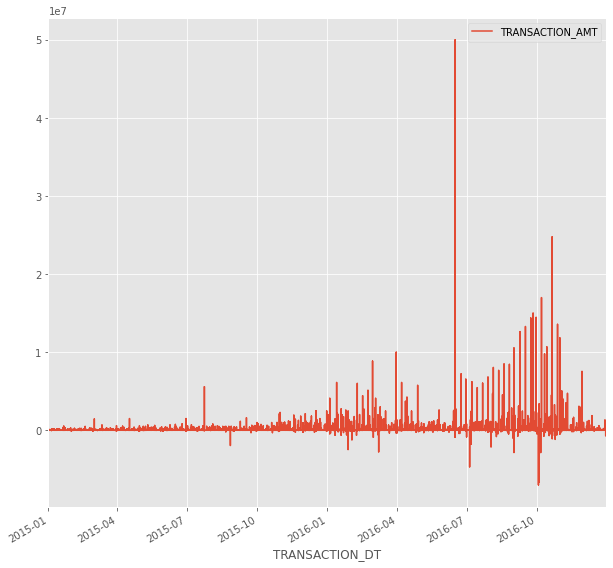

In [40]:
exp_ev.plot(xlim=('2015-01-01','2016-12-31'),figsize=(10,10))


As we can see from the above plot, the expenditures started to raise in beggining of year 2016, the year of the elections. The first months until July are unsteady, rising and dropping.That was the period were the Democrats and Republicans had not yet elected their candidates so it makes sense for that period to be a unstable.By July both parties had elected their candidate.On November 2016 the elections were held. We can see that the period between July (where the candidates were anounced) and November, had the most expenditures.This is the period were there were the most refunds, spesifically on Octomber 2016.This can be explained by the fact that at that time the most polls happened and thus the entities giving money maybe changed their minds. After November the expenditures are decreasing until December of 2016.

Sorting the dataset of operating expenditures and calculating the total amount for each receipient, we can find the ones with the biggest ammount.

In [44]:
b_rep=expenditures.groupby(by=['NAME']).sum().sort_values(by='TRANSACTION_AMT',ascending=False).head(10)
b_rep

,TRANSACTION_AMT
NAME,
GMMB,3.230724e+08
AMERICAN EXPRESS,1.299654e+08
BULLY PULPIT INTERACTIVE LLC,1.235089e+08
GILES-PARSCALE,9.154091e+07
OLD TOWNE MEDIA INC,8.304847e+07
AMERICAN MEDIA & ADVOCACY GROUP,7.473149e+07
STATWARE INC. AND OTHER FIRMS,5.000000e+07
SMART MEDIA GROUP LLC,4.064065e+07
ADP,4.026366e+07


We can see the diference between the receipients in the following graph.

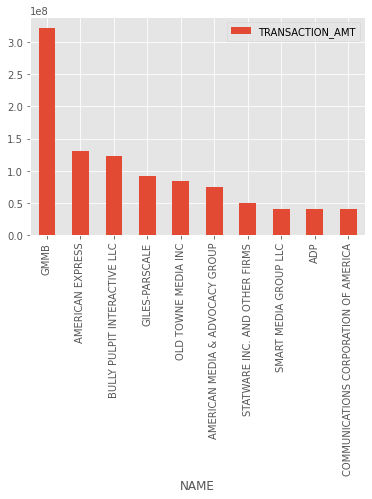

In [45]:
b_rep.plot(kind="bar")

Since the expenditures in last 4 receipients are too close to each other, i will consider the Biggest Receipients to be the top 6

So, the <b>Top 6 Receipients (Biggest Receipients) of campaign expenditures</b> are : 
    
1.	GMMB
2.	 AMERICAN EXPRESS			
3.	BULLY PULPIT INTERACTIVE LLC		
4.	GILES-PARSCALE		
5.	OLD TOWNE MEDIA INC		
6.	 AMERICAN MEDIA & ADVOCACY GROUP					

    

In order to examine the geographical distribution of campaign expenditures at the state level, we need the number of registered voters per state. This data were extract from census.gov. Census Bureu collects data for USA National Elections since 1964.

In [46]:
reg_voters = pd.read_excel('https://www2.census.gov/programs-surveys/cps/tables/p20/580/table04a.xlsx',
                       nrows = 51,#there are 51 states in USA and 51 rows in this dataset
                       skiprows=5,#rows to skip at the beggining since the first five rows are informations about the columns
                       usecols=[0,3],#we only need the columns 0 and 3 since in 1st column is the state and in the 4th is the registered voters 3 columns which are 
                       names=['STATE_NAME','TOTAL_REGISTERED']
                    )
print(reg_voters.shape)
reg_voters.head(5)

(51, 2)


,STATE_NAME,TOTAL_REGISTERED
0,ALABAMA,2526
1,ALASKA,358
2,ARIZONA,3145
3,ARKANSAS,1456
4,CALIFORNIA,16096


The number of total registred voters is in thousands so we will multiply it by 100 to see the actuall number.

In [47]:
reg_voters['TOTAL_REGISTERED'] = reg_voters['TOTAL_REGISTERED'] * 1000
reg_voters.head(5)

,STATE_NAME,TOTAL_REGISTERED
0,ALABAMA,2526000
1,ALASKA,358000
2,ARIZONA,3145000
3,ARKANSAS,1456000
4,CALIFORNIA,16096000


We need to merge this dataset with the one with expenditures but as we can see bellow, the information about states is depicted in expenditures by the states code (e.x. AL for Alaska).

In [48]:
expenditures.head(5)

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
0,C00415182,N,2015,Q1,15951142498,17,F3,SB,CHASE CARDMEMBER SERVICE,WILMINGTON,DE,198865153,02/21/2015,3301.24,P2016,CREDIT CARD PAYMENT,001,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4041520151241882404,1002978,VN81E9TS8X8,NaN
1,C00415182,N,2015,Q1,15951142495,17,F3,SB,GOOGLE INC.,SAN FRANCISCO,CA,941390001,01/21/2015,56.42,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882396,1002978,VN81E9TQB00,VN81E9TQAP1
2,C00415182,N,2015,Q1,15951142495,17,F3,SB,LINKEDIN CORPORATION,MOUNTAIN VIEW,CA,94043,01/21/2015,49.95,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882397,1002978,VN81E9TQB76,VN81E9TQAP1
3,C00415182,N,2015,Q1,15951142496,17,F3,SB,NATIONBUILDER,LOS ANGELES,CA,900131155,01/21/2015,99.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882398,1002978,VN81E9TS9X1,VN81E9TQAP1
4,C00415182,N,2015,Q1,15951142496,17,F3,SB,"NGP VAN, INC.",WASHINGTON,DC,20005,01/21/2015,2000.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882399,1002978,VN81E9TQAX7,VN81E9TQAP1


So we need to find the codes for all states and add them to the dataset of the registered voters by state.

In [49]:
states = pd.read_csv('https://www2.census.gov/geo/docs/reference/state.txt',
                     sep="|",
                     usecols=[1,2],
                     names=['STATE','STATE_NAME'],
                     skiprows=1
                    )
states['STATE_NAME'] = states['STATE_NAME'].str.upper() #the data are in lower case and we need them in upper case for the merge
states.head(5)

,STATE,STATE_NAME
0,AL,ALABAMA
1,AK,ALASKA
2,AZ,ARIZONA
3,AR,ARKANSAS
4,CA,CALIFORNIA


In [50]:
reg_voters = pd.merge(reg_voters,
                   states, 
                   on='STATE_NAME',
                   how='inner'
                 )
reg_voters.head(5)

,STATE_NAME,TOTAL_REGISTERED,STATE
0,ALABAMA,2526000,AL
1,ALASKA,358000,AK
2,ARIZONA,3145000,AZ
3,ARKANSAS,1456000,AR
4,CALIFORNIA,16096000,CA


Now that we have our state dataset we can merge it with expenditures and calculate the expenditures for each state.

In [51]:
expenditures = expenditures.groupby(by=['STATE']).sum()

In [52]:
state_expenditures = pd.merge(expenditures,
                         reg_voters,
                         on='STATE',
                         how='inner'
                        )
state_expenditures['EXPENDITURES_PER_VOTER'] = state_expenditures['TRANSACTION_AMT'].div(state_expenditures['TOTAL_REGISTERED'])
state_expenditures = state_expenditures.drop(state_expenditures.columns[[0, 1, 3]], axis=1) 
state_expenditures

,STATE_NAME,EXPENDITURES_PER_VOTER
0,ALASKA,22.491305
1,ALABAMA,7.652557
2,ARKANSAS,19.195511
3,ARIZONA,13.479196
4,CALIFORNIA,19.077705
5,COLORADO,21.823466
6,CONNECTICUT,43.847077
7,DISTRICT OF COLUMBIA,2853.798824
8,DELAWARE,33.525362
9,FLORIDA,18.390023


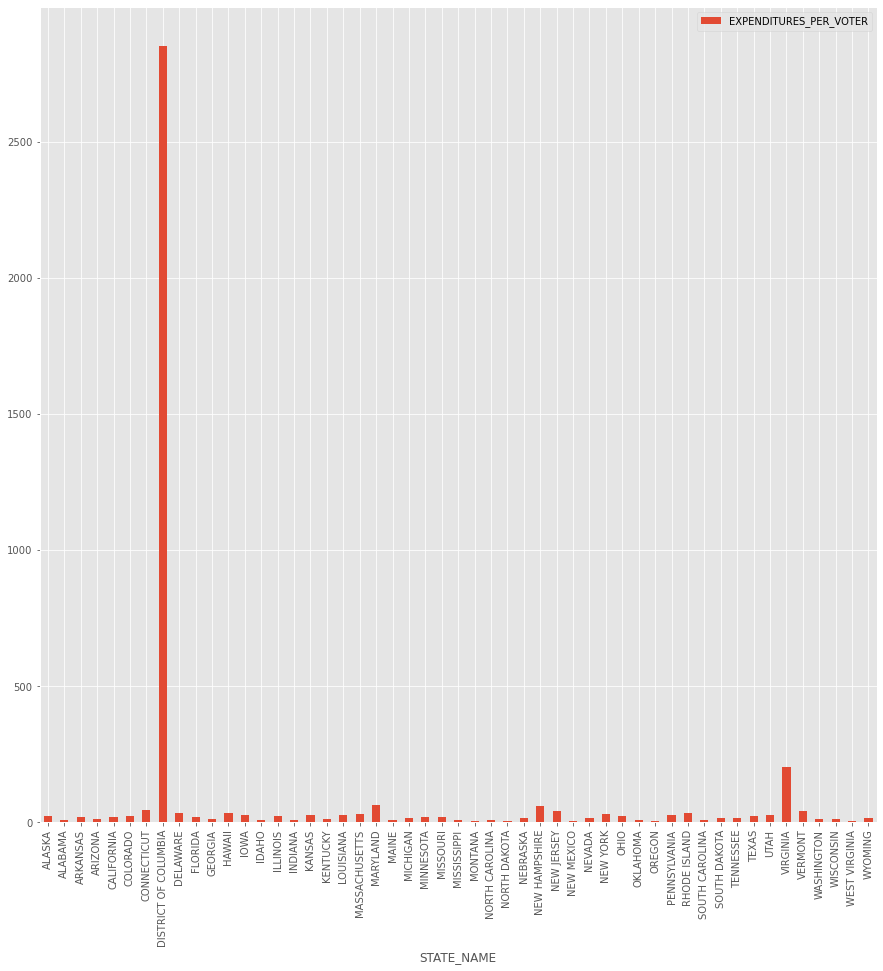

In [53]:
state_expenditures.plot.bar(x='STATE_NAME', y='EXPENDITURES_PER_VOTER', figsize=(15,15))

We can see that by far the District of Columbia have the most expenditures per voters. In that state is the capital of the United States of America, so it makes sense that the expenditures per voters will be high there, because most receipients are located there. The other states behave mostly the same with a few exceptions specifically the state of Virginia.

Swing state refers to any state that could reasonably be won by either the Democratic or Republican presidential candidate by a swing in votes. These states are usually targeted by both major-party campaigns, especially in competitive elections.

The swing states fot the 2016 Presidential elections were : Colorado, Florida, Iowa, Michigan, Minnesota, Nevada, New Hampshire, North Carolina, Ohio, Pennsylvania and Virginia [source:https://constitutioncenter.org/ ].

In [55]:
swing_states = state_expenditures[(state_expenditures['STATE_NAME']=='COLORADO') | 
                                  (state_expenditures['STATE_NAME']=='FLORIDA') |
                                  (state_expenditures['STATE_NAME']=='IOWA') |
                                  (state_expenditures['STATE_NAME']=='MICHIGAN') |
                                  (state_expenditures['STATE_NAME']=='MINNESOTA') |
                                  (state_expenditures['STATE_NAME']=='NEVADA') |
                                  (state_expenditures['STATE_NAME']=='NEW HAMPSHIRE') |
                                  (state_expenditures['STATE_NAME']=='NORTH CAROLINA') |
                                  (state_expenditures['STATE_NAME']=='OHIO') |
                                  (state_expenditures['STATE_NAME']=='PENNSYLVANIA') |
                                 (state_expenditures['STATE_NAME']=='VIRGINIA')]  
print(swing_states.shape)
swing_states

(11, 2)


,STATE_NAME,EXPENDITURES_PER_VOTER
5,COLORADO,21.823466
9,FLORIDA,18.390023
12,IOWA,27.451721
22,MICHIGAN,14.683076
23,MINNESOTA,18.217868
27,NORTH CAROLINA,7.124499
30,NEW HAMPSHIRE,59.549137
33,NEVADA,16.559623
35,OHIO,22.092520
38,PENNSYLVANIA,25.481415


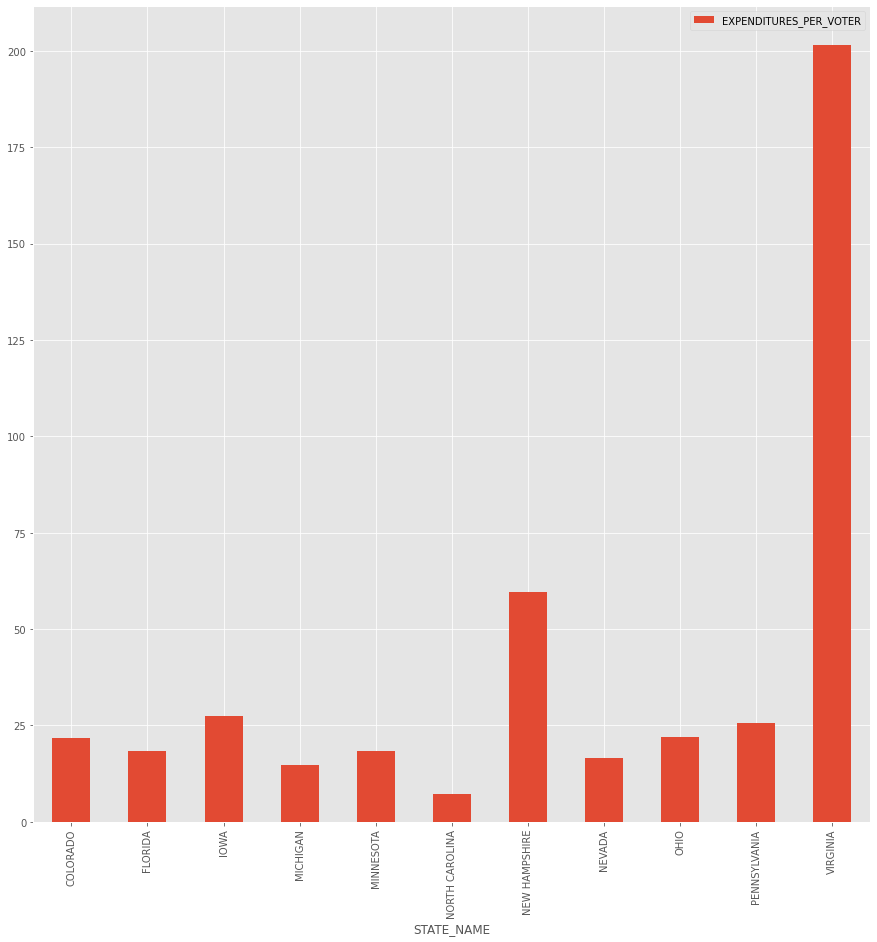

In [56]:
swing_states.plot.bar(x='STATE_NAME', y='EXPENDITURES_PER_VOTER', figsize=(15,15))

As expected most swing states have close expenditures per voters except North Carolina, New Hampshire and Virginia. The overall results are similar to the results of all the states that we saw before. So the expenditures per voters does not change significantly between regular states and swing states.